###  print out structures

In [11]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn
from mycrograd_debug.util_debug import (
    debugPrint,
    print_my_params,
    print_all_values,
    backupParameters,
    restoreParameters,
)
np.random.seed(1337)
random.seed(1337)

In [12]:
# loss function
def loss(targets,outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss


#### Value

number of Value objects created =  1
Value(name=hello001,layernumber=,neuronnumber=,weightnumber=,type=a,data=4.5, grad=0)


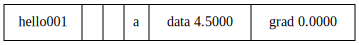

In [13]:
Value.value_counter=0
a=Value(4.5,type='a',name='hello')
print("number of Value objects created = ",Value.value_counter)
print(a)
draw_dot(a)

#### Neuron

number of inputs:  3
Neuron:  ReLUNeuron(3)
weights:  [Value(name=v001,layernumber=L,neuronnumber=N,weightnumber=,type=w1,data=0.23550571390294128, grad=0), Value(name=v002,layernumber=L,neuronnumber=N,weightnumber=,type=w2,data=0.06653114721000164, grad=0), Value(name=v003,layernumber=L,neuronnumber=N,weightnumber=,type=w3,data=-0.26830328150124894, grad=0)]
b:  Value(name=v004,layernumber=L,neuronnumber=N,weightnumber=,type=b,data=0, grad=0)
b type:  b
number of parameters  4
parameters  [Value(name=v001,layernumber=L,neuronnumber=N,weightnumber=,type=w1,data=0.23550571390294128, grad=0), Value(name=v002,layernumber=L,neuronnumber=N,weightnumber=,type=w2,data=0.06653114721000164, grad=0), Value(name=v003,layernumber=L,neuronnumber=N,weightnumber=,type=w3,data=-0.26830328150124894, grad=0), Value(name=v004,layernumber=L,neuronnumber=N,weightnumber=,type=b,data=0, grad=0)]
inputs  [8 9 8]
targets  [8]
number of Value objects created =  14
activation:  Value(name=v014,layernumber=,neuro

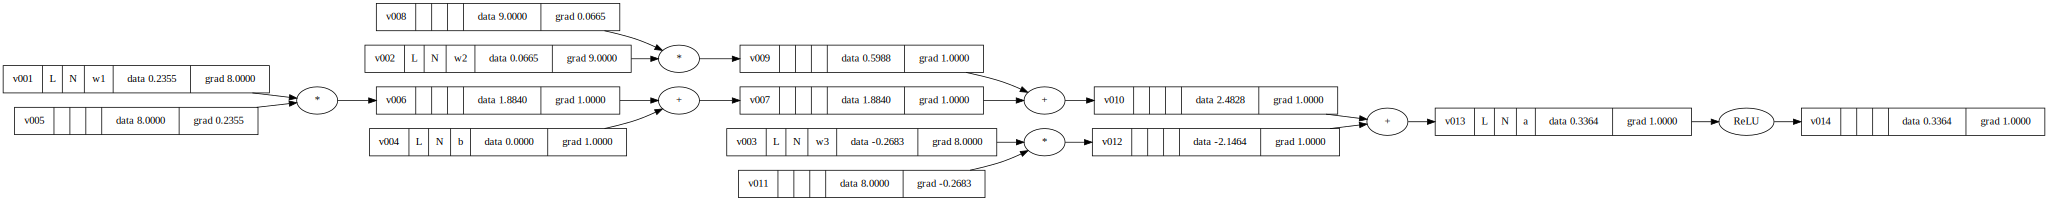

In [14]:
nin=3  #number of inputs
nout=1  #number of outputs

Value.value_counter=0

myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b type: ",myNeuron.b.type)
print("number of parameters ", len(myNeuron.parameters()))
print("parameters ",myNeuron.parameters())

# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
xtarget= np.random.randint(1,10, size=(nout))   # targets
print("targets ", xtarget)


#loss_Neuron=loss(myNeuron(xi),xtarget)
loss_Neuron=myNeuron(xi)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",loss_Neuron)
loss_Neuron.backward()
draw_dot(loss_Neuron)

#### Layer

Layer:  Layer of [LinearNeuron(4), LinearNeuron(4)]
Neurons:  [LinearNeuron(4), LinearNeuron(4)]
Neuron:  LinearNeuron(4)
Neuron:  LinearNeuron(4)
inputs  [3 3 5 9]
number of Value objects created =  34
activation:  [Value(name=v022,layernumber=L1,neuronnumber=N1,weightnumber=,type=a,data=6.0, grad=0), Value(name=v034,layernumber=L1,neuronnumber=N2,weightnumber=,type=a,data=6.0, grad=0)]


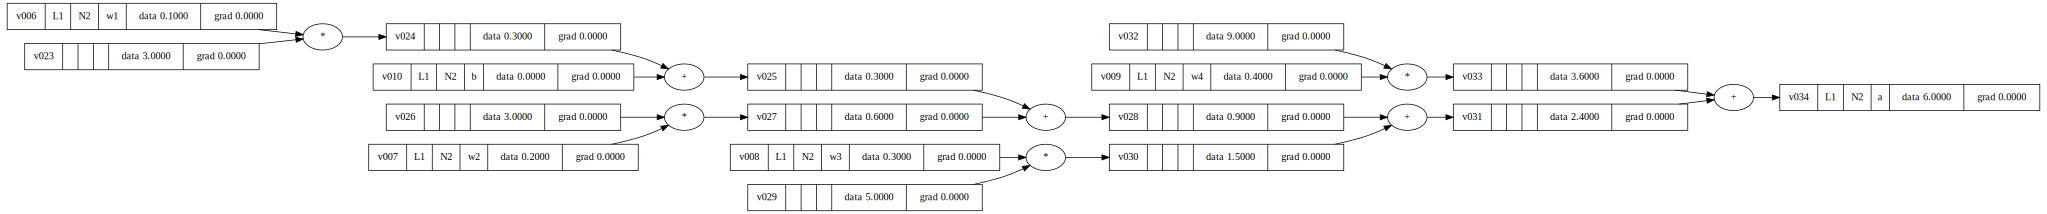

In [15]:
nin=4  #number of inputs
nout=2  #number of outputs
nonlin = False

Value.value_counter=0

myLayer = Layer(
    nin, nout, layernumber="L1", nonlin=nonlin, weightsinit=1, debug_bw=True
)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)

for neuron in myLayer.neurons:
    print("Neuron: ",neuron)
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
loss_myLayer=myLayer(xi)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",loss_myLayer)
draw_dot(loss_myLayer[1])


#### Multi Layer Perceptron

In [16]:
# initialize a model 
nin=3  #number of inputs
Value.value_counter=0

model = MLP(nin, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)


#ys = [1.0]  # desired targets
#ypred = [model(x) for x in xi]
#loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))


xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets
ypred = [model(x) for x in xs]
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))



#loss_model=myNeuron(xi)


print("number of Value objects created = ",Value.value_counter)

#print("activation: ",loss_model)
#draw_dot(loss)


Module nn MLP: structure [3, 4, 4, 1]
MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 41
inputs  [7 7 8]
number of Value objects created =  394


## Gradient

In [17]:
Value.value_counter=0

myNeuron1 = Neuron(1,nonlin=False)
myNeuron2 = Neuron(1,nonlin=False)
print(myNeuron1.parameters())
print("weights: ",myNeuron1.w)

print(myNeuron2.parameters())

input1 = [1.0]
input2 = [1.0]
loss = myNeuron1(input1) * myNeuron2(input2)
print("number of Value objects created = ",Value.value_counter)

print("loss=",loss)

#draw_dot(loss)
loss.backward()

[Value(name=v001,layernumber=L,neuronnumber=N,weightnumber=,type=w1,data=-0.8653994554527067, grad=0), Value(name=v002,layernumber=L,neuronnumber=N,weightnumber=,type=b,data=0, grad=0)]
weights:  [Value(name=v001,layernumber=L,neuronnumber=N,weightnumber=,type=w1,data=-0.8653994554527067, grad=0)]
[Value(name=v003,layernumber=L,neuronnumber=N,weightnumber=,type=w1,data=0.05088685407468296, grad=0), Value(name=v004,layernumber=L,neuronnumber=N,weightnumber=,type=b,data=0, grad=0)]
number of Value objects created =  11
loss= Value(name=v011,layernumber=,neuronnumber=,weightnumber=,type=,data=-0.044037455805931984, grad=0)


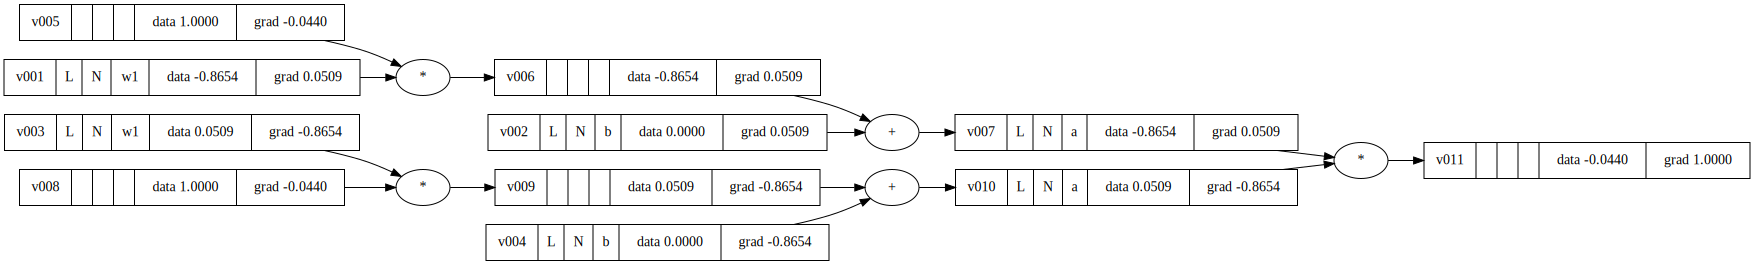

In [18]:
draw_dot(loss)